In [1]:
# Framework
from model.model import FrameWorkFlauzino

# Manipulação
import pandas as pd

# Modelos
from sklearn import ensemble
from sklearn import tree
from sklearn import linear_model 
import sklearn

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


### Leitura do arquivo

In [2]:
depressao = pd.read_csv('dataset/b_depressed.csv', sep = ",").dropna()

### Declarando X e Y

In [3]:
X = depressao[['sex', 'Age', 'Married', 'Number_children',
       'education_level', 'total_members', 'gained_asset', 'durable_asset',
       'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen']]

y = depressao['depressed']

framework = FrameWorkFlauzino(X, y)

### Realizando oversample

In [4]:
framework.reamostragem('oversample')

Distribuição antes da reamostragem: 

0    1174
1     235
Name: depressed, dtype: int64
Distribuição da target reamostrada com oversample: 

0    1174
1    1174
Name: depressed, dtype: int64


### Separando em treino e teste

In [5]:
framework.treino_teste(0.30)

Quantidade de registros antes da separação de treino e teste: 

2348 

Quantidade de registros após separação de treino e teste: 

X_treino: 1643 

x_teste: 705 

y_treino: 1643 

y_teste: 705 



### Criando pipeline

In [6]:
# Convertendo alguns campos
depressao['labor_primary'] = depressao['labor_primary'].astype(str)
depressao['sex'] = depressao['sex'].astype(str)
depressao['Married'] = depressao['Married'].astype(str)
depressao['incoming_salary'] = depressao['incoming_salary'].astype(str)
depressao['incoming_own_farm'] = depressao['incoming_own_farm'].astype(str)
depressao['incoming_business'] = depressao['incoming_business'].astype(str)
depressao['incoming_no_business'] = depressao['incoming_no_business'].astype(str)

In [7]:
# Definido estratégias para variáveis numéricas e categóricas
variaveis_numericas = ['Age', 'Number_children', 'education_level', 
                        'total_members', 'gained_asset', 'durable_asset',
                        'save_asset', 'living_expenses', 'other_expenses',
                        'incoming_agricultural', 'farm_expenses', 'lasting_investment', 
                        'no_lasting_investmen']

variaveis_categoricas = ['incoming_salary', 'incoming_own_farm', 'incoming_business',
                        'incoming_no_business', 'labor_primary']

padronizacao = 'StandardScaler'

estrategia_variaveis_categoricas = 'TargetEncoder'

In [8]:
# Criando Pipeline
framework.criacao_pipeline(variaveis_numericas, 
                           variaveis_categoricas, 
                           padronizacao, 
                           estrategia_variaveis_categoricas)

Pipeline criado:
 ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('estrategia_categoricas',
                                                  TargetEncoder())]),
                                 ['incoming_salary', 'incoming_own_farm',
                                  'incoming_business', 'incoming_no_business',
                                  'labor_primary']),
                                ('num',
                                 Pipeline(steps=[('padronização',
                                                  StandardScaler())]),
                                 ['Age', 'Number_children', 'education_level',
                                  'total_members', 'gained_asset',
                                  'durable_asset', 'save_asset',
                                  'living_expenses', 'other_expenses',
                                  'incoming_agricultural', 'farm_expenses',
                                  'lasting_inve

### Executando pipeline

In [9]:
# Algoritmos que serão utilizados
algoritmos = [
        tree.DecisionTreeClassifier(),
        ensemble.RandomForestClassifier(), 
        ensemble.GradientBoostingClassifier(),
        linear_model.LogisticRegression()
        ]

# Definindo parametros para os modelos que serão utilizados
params = {
            'DecisionTreeClassifier': {'modelos__min_samples_split': [2,10], 'modelos__max_depth': [2, 5]}, 
            'RandomForestClassifier': {'modelos__n_estimators': [100,1000], 'modelos__min_samples_split': [2,10], 'modelos__max_depth': [2, 5]},
            'GradientBoostingClassifier': {'modelos__n_estimators': [100, 1000], 'modelos__learning_rate': [0.1, 0.4], 'modelos__max_depth': [3, 5]},
            'LogisticRegression': {"modelos__penalty": ['l2', 'none']}
        }

# Definindo k folds
k = 5

# Definindo avaliadores que serão utilizados
avaliadores = ['roc', 'precisao', 'recall', 'f1_score', 'matriz']

Treinando DecisionTreeClassifier...
Melhores parâmetros: {'modelos__max_depth': 5, 'modelos__min_samples_split': 2}
Melhores resultados: 0.6221975528896974
Registrando DecisionTreeClassifier pelo job lib na pasta modelos_salvos
Treinando RandomForestClassifier...
Melhores parâmetros: {'modelos__max_depth': 5, 'modelos__min_samples_split': 2, 'modelos__n_estimators': 1000}
Melhores resultados: 0.7174411761712493
Registrando RandomForestClassifier pelo job lib na pasta modelos_salvos
Treinando GradientBoostingClassifier...
Melhores parâmetros: {'modelos__learning_rate': 0.4, 'modelos__max_depth': 5, 'modelos__n_estimators': 100}
Melhores resultados: 0.8466953812325638
 Exibindo shap values para GradientBoostingClassifier


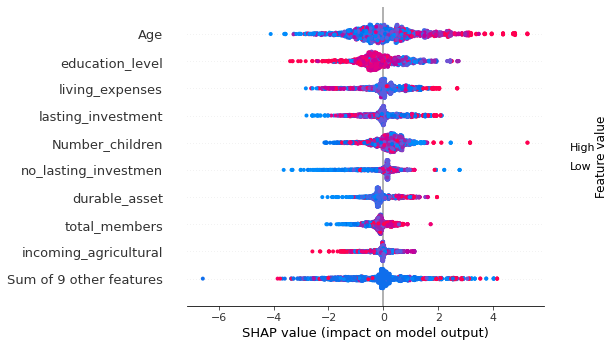

Registrando GradientBoostingClassifier pelo job lib na pasta modelos_salvos
Treinando LogisticRegression...
Melhores parâmetros: {'modelos__penalty': 'l2'}
Melhores resultados: 0.5905223467552234
Registrando LogisticRegression pelo job lib na pasta modelos_salvos


In [10]:
# Executando pipeline
framework.execucao_pipeline(params,
                            algoritmos,
                            k,
                            avaliadores)

### Avaliando resultados

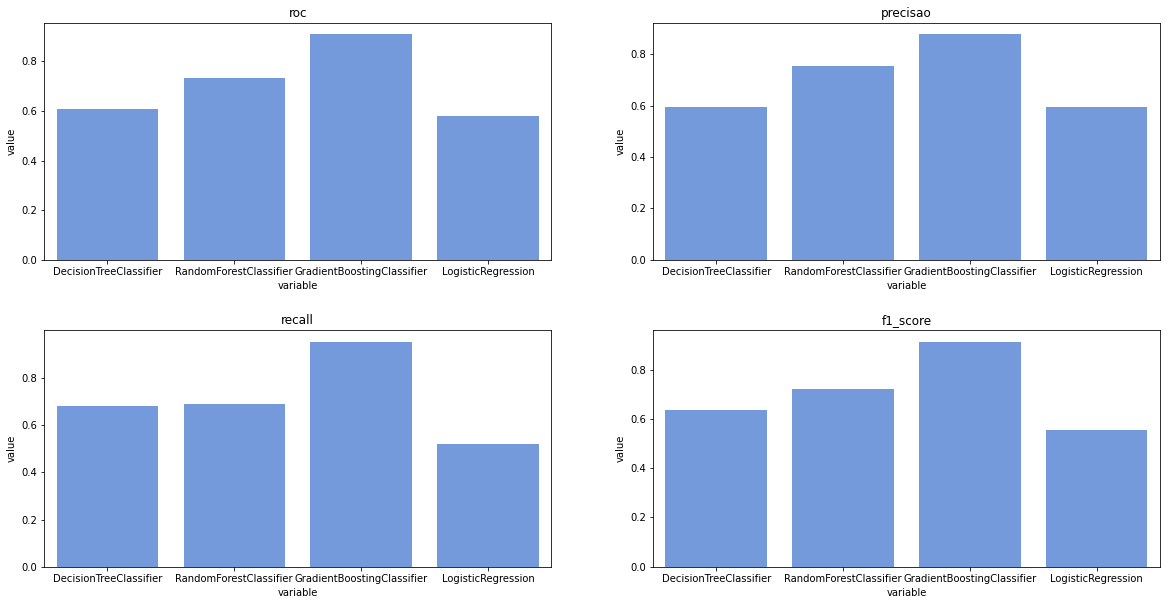

In [11]:
framework.gerando_relatorio()